### Supplementary Figure NEW
###### last updated 2025-06-14





In [7]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import random


In [15]:
import protfasta
import metapredict as meta
from time import time

In [16]:
def sequential(seqs):
    start = time()
    for s in seqs:
        meta.predict(s)
    return time()-start

def batch(seqs):
    start = time()
    meta.predict(seqs)        
    return time()-start

In [17]:


def select_seqs(n):
    if len(HP) < n:
        raise ValueError('Cannot request more proteins than in human proteome!')
    selected_keys = random.sample(list(HP.keys()), n)
    return [HP[k] for k in selected_keys]
    
HP = protfasta.read_fasta('UP000005640_9606.fasta', invalid_sequence_action='convert')

In [75]:
RECOMPUTE = True

version='2'

if RECOMPUTE:

    # takes maybe 10 min?
    sequential_times = []
    batch_times = []
    all_counts = [10, 50, 100, 200,500,1000,2000, 3000, 4000, 5000, 8000, 10000,15000]
    for count in all_counts:
        print(count)
        seqs = select_seqs(count)
        sequential_times.append(sequential(seqs))
        batch_times.append(batch(seqs))

    sequential_times = np.array(sequential_times)
    batch_times = np.array(batch_times)
    
    np.savetxt(f'sequential_times_v{version}_.csv', sequential_times)
    np.savetxt(f'batch_times_v{version}_.csv', batch_times)   

else:
    sequential_times = np.loadtxt(f'sequential_times_v{version}.csv')
    batch_times = np.loadtxt(f'batch_times_v{version}.csv')
    

10
50
100
200
500
1000
2000
3000
4000
5000
8000
10000
15000


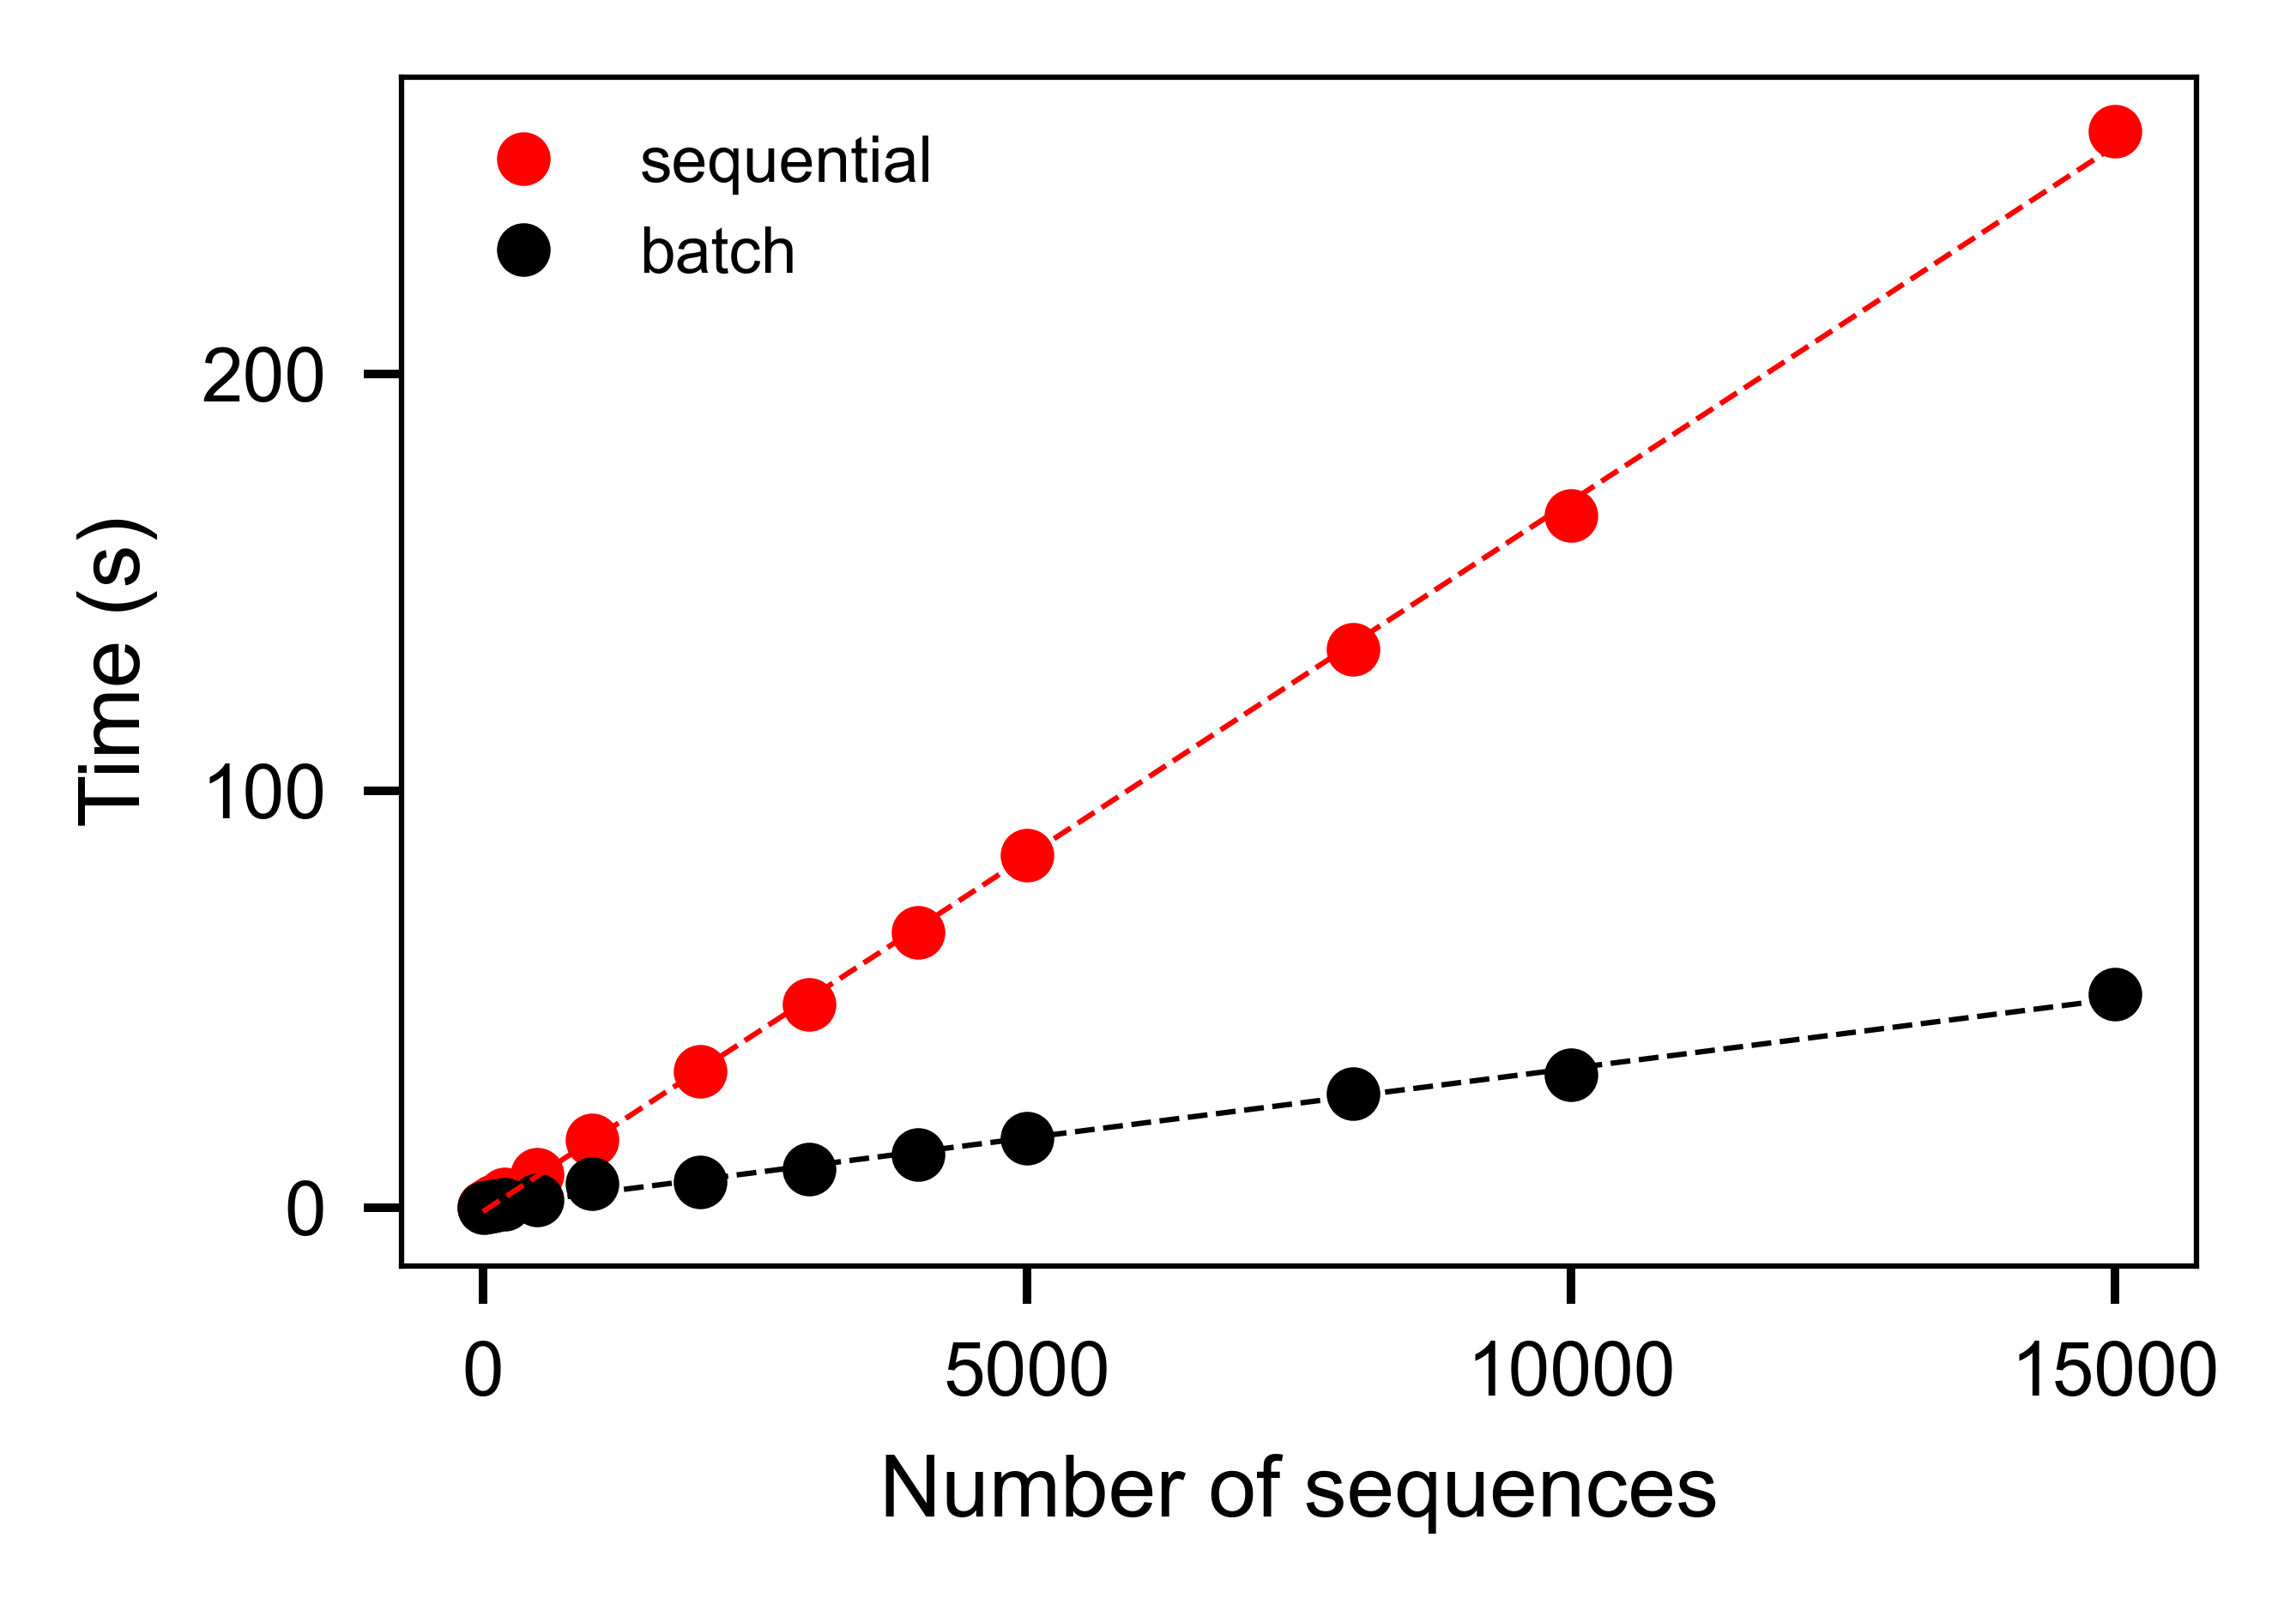

In [74]:
figure(None, (3,2), dpi=450)
plt.plot(all_counts, sequential_times,'or', ms=4, lw=0.5, label='sequential')
plt.plot(all_counts, batch_times,'ok', ms=4, lw=0.5,  label='batch')
plt.legend(fontsize=6, frameon=False)


fit_sequential = np.polyfit(all_counts, sequential_times,1)
fit_batch      = np.polyfit(all_counts, batch_times,1)
xvals = np.arange(1,15000,10)
yvals = fit_batch[0]*xvals+fit_batch[1]
plt.plot(xvals, yvals, '--k', lw=0.5)

xvals = np.arange(1,15000,10)
yvals = fit_sequential[0]*xvals+fit_sequential[1]
plt.plot(xvals, yvals, '--r', lw=0.5)

    
plt.ylabel('Time (s)', fontsize=8)
plt.xlabel('Number of sequences', fontsize=8)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig(f'time_vs_sequences_version_{v}.pdf')